In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt;

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/videogamesales/vgsales.csv


In [2]:
data=pd.read_csv("../input/videogamesales/vgsales.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

> > > In this data set there are 11 columns. Their names and data types as follows:

* **Rank** - Ranking of overall sales, integer

* **Name** - The games name, object

* **Platform** - Platform of the games release (i.e. PC,PS4, etc.), object

* **Year** - Year of the game's release, float

* **Genre** - Genre of the game ,object

* **Publisher** - Publisher of the game

* **NA_Sales** - Sales in North America (in millions)

* **EU_Sales** - Sales in Europe (in millions)

* **JP_Sales** - Sales in Japan (in millions)

* **Other_Sales** - Sales in the rest of the world (in millions)

* **Global_Sales** - Total worldwide sales.

In [5]:
data.dropna(subset=['Publisher'],inplace=True);
data['Year'].fillna(method='ffill',inplace=True);

# Action Genre has the Highest Global Sales and Platform Genre has Highest Average Global Sales

In [6]:
totalsales=round(data.groupby(['Genre']).sum(),0)
totalsales.reset_index(inplace=True)
avgsales=round(data.groupby(['Genre']).mean(),2)
avgsales.reset_index(inplace=True)

In [7]:
sales=[]
for i in range(0,len(totalsales)):
    one ={
	    'Genre' : totalsales.iloc[i]['Genre'],
	    'Total_Sales' : totalsales.iloc[i]['Global_Sales'],
	    'Avg_Sales' : avgsales.iloc[i]['Global_Sales']
	    }
    sales.append(one)
sales=pd.DataFrame(sales)
sales.sort_values('Total_Sales',inplace=True)

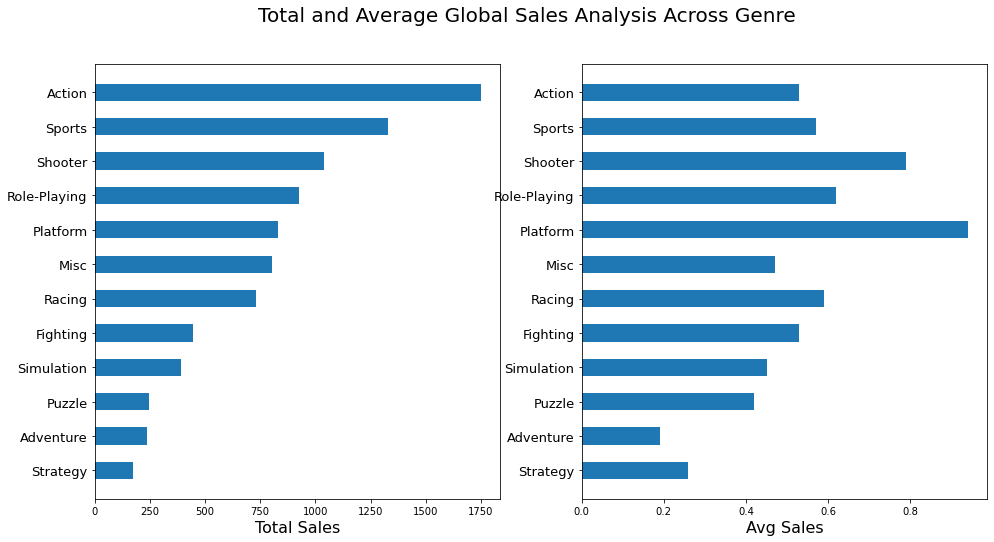

In [8]:
plt.figure(figsize=(16,8))
plt.suptitle('Total and Average Global Sales Analysis Across Genre',fontsize=20)
plt.subplot(121)
plt.barh(sales['Genre'],sales['Total_Sales'],height=0.5)
plt.xlabel('Total Sales',fontsize=16)
plt.yticks(fontsize=13)
plt.subplot(122)
plt.barh(sales['Genre'],sales['Avg_Sales'],height=0.5)
plt.xlabel('Avg Sales',fontsize=16)
plt.yticks(fontsize=13)
plt.show()

# Global Sales Percentage Distributed between Genre

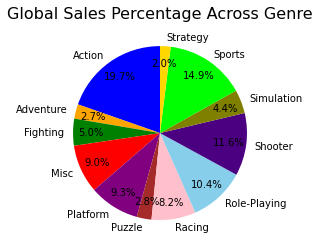

In [9]:
color=['blue','orange','green','red','purple','brown','pink','skyblue','indigo','olive','lime','gold']
#plt.figure(figsize=(5,5))
plt.pie(totalsales.Global_Sales,labels=totalsales.Genre,pctdistance=0.8,labeldistance=1.1,autopct='%1.1f%%',startangle=90,colors=color,)
plt.title('Global Sales Percentage Across Genre',fontsize=16)
plt.show()

# Number of Games In Top 20 Platform

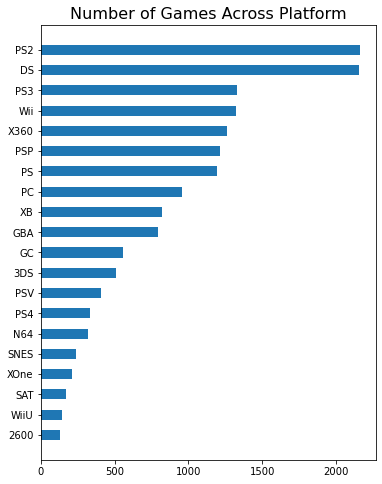

In [10]:
platform=pd.DataFrame(data.Platform.value_counts())
platform.reset_index(inplace=True)
platform.rename(columns={'Platform': 'Number of Games', 'index': 'Platform'},inplace=True)
platform.drop(platform.index[20:],inplace=True)
platform.sort_values('Number of Games',inplace=True)
plt.figure(figsize=(6,8))
plt.barh(platform.Platform,platform['Number of Games'],height=0.5)
plt.title('Number of Games Across Platform',fontsize=16)
plt.show()


# Sales Percentage Distribution Across Region

In [11]:
Genre=[]
North_America=[]
Europe=[]
Japan=[]
Other=[]
for i in range(0,len(totalsales)):
    Genre.append(totalsales.iloc[i].Genre)
    net=100/totalsales.iloc[i].Global_Sales
    North_America.append(round(totalsales.iloc[i].NA_Sales*net,4))
    Europe.append(round(totalsales.iloc[i].EU_Sales*net,4))
    Japan.append(round(totalsales.iloc[i].JP_Sales*net,4))
    Other.append(round(totalsales.iloc[i].Other_Sales*net,4))

Genre=np.array(Genre)
North_America=np.array(North_America)
Europe=np.array(Europe)
Japan=np.array(Japan)
Other=np.array(Other)


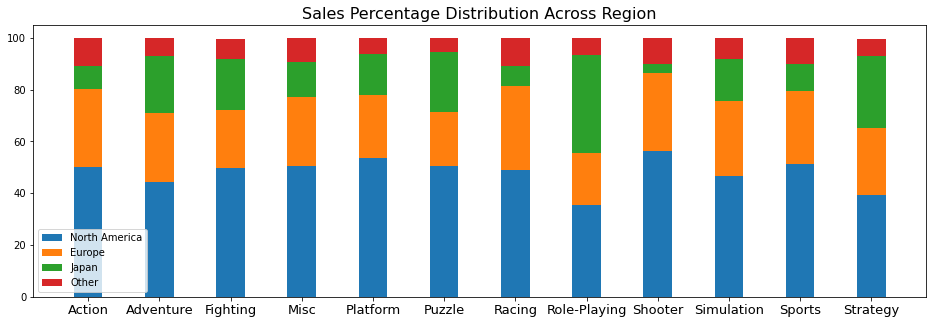

In [12]:
ind=np.arange(12)
width=0.4
plt.figure(figsize=(16,5))
plt.bar(ind,North_America,width)
plt.bar(ind,Europe,width,bottom=North_America)
plt.bar(ind,Japan,width,bottom=North_America+Europe)
plt.bar(ind,Other,width,bottom=North_America+Europe+Japan)
plt.xticks(ind,Genre,fontsize=13)
plt.legend(['North America','Europe','Japan','Other'])
plt.title('Sales Percentage Distribution Across Region',fontsize=16)
plt.show()


# Top 5 Games for Each Genre

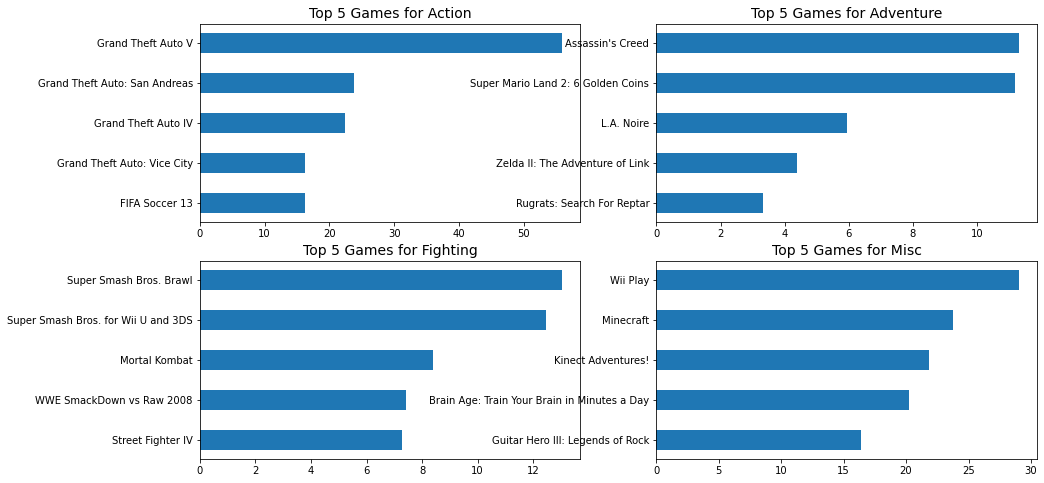

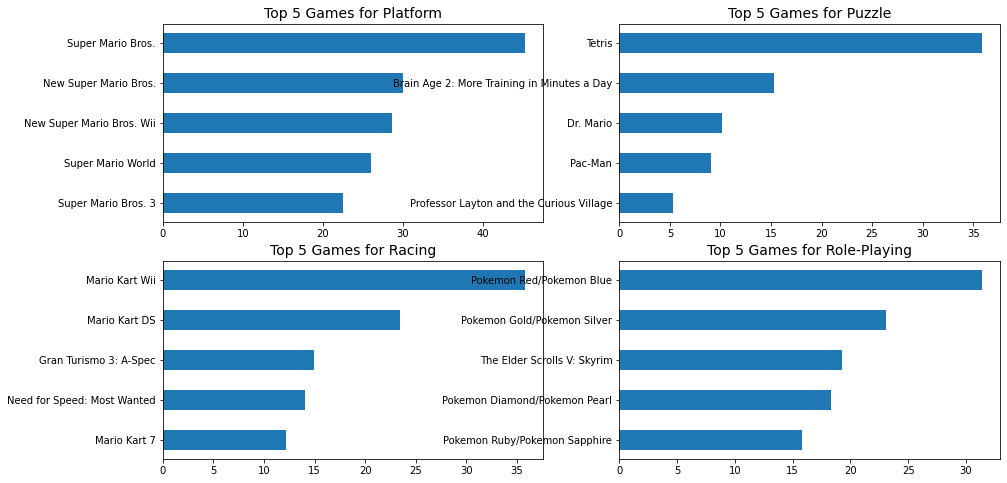

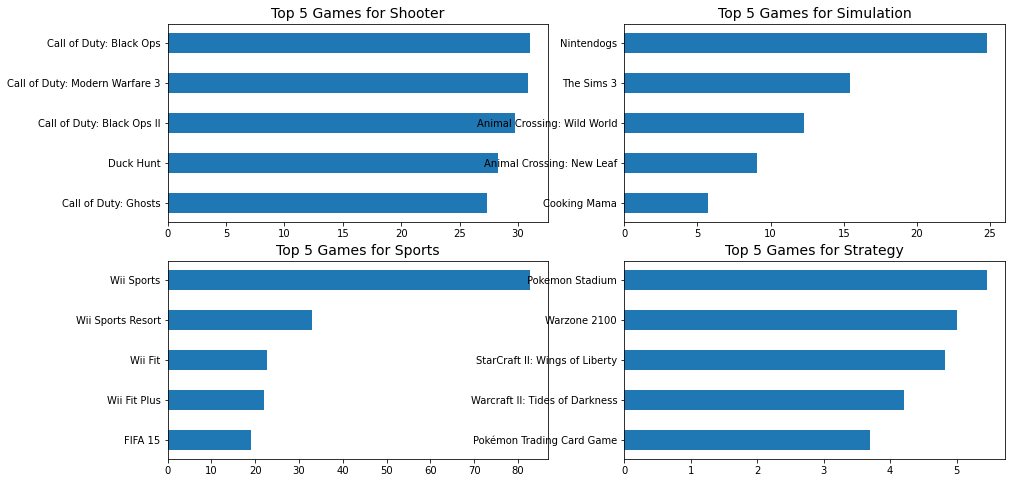

<Figure size 1080x576 with 0 Axes>

In [13]:
i=0
df=data.groupby(['Genre'])
plt.figure(figsize=(15,8))
for genre,games in df:
    games=round(games.groupby(['Name']).sum(),2)
    games.reset_index(inplace=True)
    games.sort_values(['Global_Sales'],inplace=True)
    games=games.iloc[len(games)-5:]
    i=i+1
    plt.subplot(2,2,i)
    plt.barh(games.Name,games.Global_Sales,height=0.5)
    plt.title("Top 5 Games for " + genre,fontsize=14)
    if i%4==0:
        i=0
        plt.show()
        plt.figure(figsize=(15,8))


# Global Sales Distribution Across Genre in Top 15 Platform

In [14]:
platform=pd.DataFrame(data.groupby(['Platform']).sum())
platform.sort_values(['Global_Sales'],ascending=False,inplace=True)
platform.reset_index(inplace=True)
top15=[]
for i in range(0,15):
    top15.append(platform.iloc[i]['Platform'])
full=[]
for genre,table in df:
    table=round(table.groupby(['Platform']).sum(),0)
    table.reset_index(inplace=True)
    temp=[]
    for each in top15:
	    x=table[['Global_Sales']][table.Platform==each]
	    if len(x)==0:
		    temp.append(0)
	    else :
		    temp.append(x.iat[0,0])
    full.append(np.array(temp))


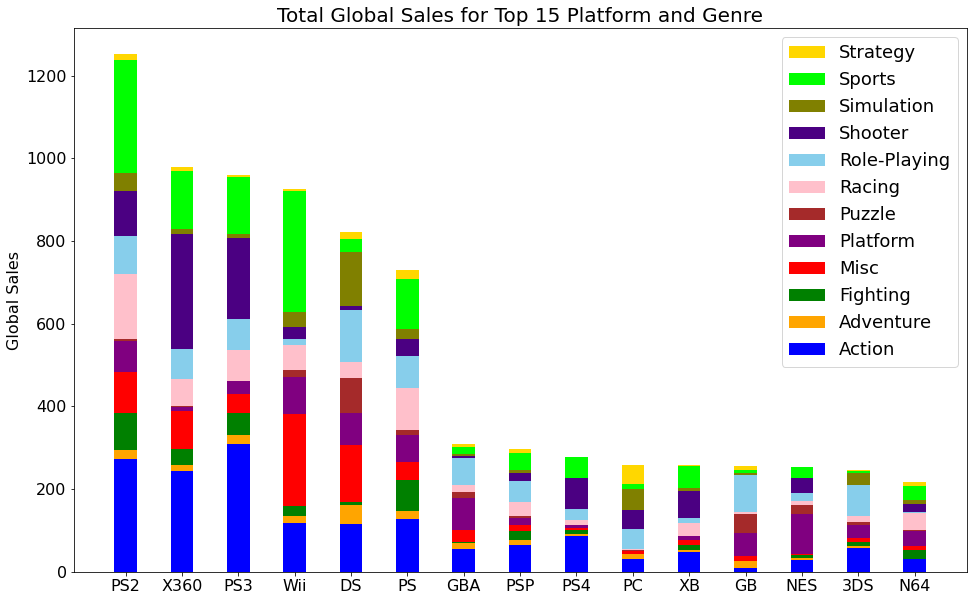

In [15]:
prev=np.zeros(15)
ind=np.arange(0,15)
px=[]
plt.figure(figsize=(16,10))
for i in range(0,len(Genre)):
    px.append(plt.bar(ind,full[i],width,bottom=prev,color=color[i]))
    prev=prev+full[i]
plt.xticks(ind,top15,fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Global Sales',fontsize=16)
plt.title('Total Global Sales for Top 15 Platform and Genre',fontsize=20)
plt.legend(reversed(px),reversed(Genre),fontsize=18);
plt.show()